Install libraries😉

In [ ]:
!pip install awscli brukeropusreader

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 79 kB 4.0 MB/s 
     |████████████████████████████████| 8.4 MB 30.4 MB/s 
     |████████████████████████████████| 547 kB 58.8 MB/s 
     |████████████████████████████████| 138 kB 38.7 MB/s 
  Created wheel for brukeropusreader: filename=brukeropusreader-1.3.4-py3-none-any.whl size=5327 sha256=a0e525af194b88960d0a6da6137283382f779b18200397b4e28dc6579ea8a559
  Stored in directory: /root/.cache/pip/wheels/ee/9c/e1/07c1426091abdfe9f9a908dce4630c97fa5ca779173b57cae4
Successfully built brukeropusreader
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
!aws s3 sync s3://afsis afsis --no-sign-request

Streaming output truncated to the last 5000 lines.
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oauMks6gU_0 to afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oauMks6gU_0
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oem7F2Fpj_0 to afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oem7F2Fpj_0
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oYtYBW2vG_0 to afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oYtYBW2vG_0
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oiNMBkv7s_0 to afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oiNMBkv7s_0
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-ojLN0LeIo_0 to afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-ojLN0LeIo_0
download: s3://afsis/tansis/Dry_Chemistry/TanSIS/Bruker_Alpha_ZnSe/TanSAG_TOP-oRnpdc6ID_0 to afsis/tansis/Dry

In [ ]:
SPECTRA_LOC = 'Bruker_HTSXT/*' #'Bruker_HTSXT/*' seems to be the one

#Data handling
from pathlib import Path
from brukeropusreader import read_file
from tqdm.notebook import tqdm

AFSIS_DIR = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')
names = []
spectra = []

for dir in tqdm(AFSIS_DIR.glob(SPECTRA_LOC)):
  if dir.is_file():
    spect_data = read_file(dir)
    spectra.append(spect_data["AB"])
    names.append(dir.stem)
wave_nos = spect_data.get_range()

column_labels = ['{:4f}'.format(x) for x in wave_nos]
spectra_htsxt_df = pd.DataFrame(spectra, index = names, columns = column_labels)
#spectra_htsxt_df.head()

In [ ]:
print(spectra_htsxt_df.info())
spectra_htsxt_df

<class 'pandas.core.frame.DataFrame'>
Index: 7346 entries, icr050235 to icr041700
Columns: 3578 entries, 7498.059202 to 599.767596
dtypes: float64(3578)
memory usage: 200.6+ MB
None


,7498.059202,7496.130689,7494.202176,7492.273663,7490.345150,7488.416636,7486.488123,7484.559610,7482.631097,7480.702584,7478.774071,7476.845557,7474.917044,7472.988531,7471.060018,7469.131505,7467.202991,7465.274478,7463.345965,7461.417452,7459.488939,7457.560426,7455.631912,7453.703399,7451.774886,7449.846373,7447.917860,7445.989347,7444.060833,7442.132320,7440.203807,7438.275294,7436.346781,7434.418268,7432.489754,7430.561241,7428.632728,7426.704215,7424.775702,7422.847189,...,674.979609,673.051096,671.122583,669.194070,667.265557,665.337043,663.408530,661.480017,659.551504,657.622991,655.694478,653.765964,651.837451,649.908938,647.980425,646.051912,644.123399,642.194885,640.266372,638.337859,636.409346,634.480833,632.552320,630.623806,628.695293,626.766780,624.838267,622.909754,620.981241,619.052727,617.124214,615.195701,613.267188,611.338675,609.410161,607.481648,605.553135,603.624622,601.696109,599.767596
icr050235,0.332373,0.326300,0.319307,0.322081,0.334053,0.340602,0.331603,0.318847,0.314888,0.313832,0.312306,0.315038,0.321791,0.329239,0.334518,0.333639,0.327934,0.325284,0.324000,0.316998,0.308748,0.306104,0.309498,0.315388,0.318305,0.316496,0.313895,0.315314,0.317135,0.313257,0.308995,0.309110,0.307879,0.303735,0.301946,0.303856,0.307293,0.314260,0.324188,0.327882,...,1.583828,1.588557,1.592729,1.594578,1.594842,1.597492,1.601862,1.604157,1.602709,1.599404,1.595972,1.592133,1.588159,1.584838,1.581898,1.579825,1.579697,1.581826,1.584936,1.587194,1.588734,1.589184,1.588775,1.589486,1.590646,1.590098,1.585444,1.575994,1.563689,1.547455,1.526026,1.504425,1.486283,1.467902,1.446164,1.424586,1.406856,1.392547,1.382000,1.375880
icr048756,0.258518,0.252318,0.246355,0.249536,0.259984,0.265326,0.257892,0.247620,0.244208,0.243754,0.243462,0.245517,0.250381,0.256059,0.259320,0.257828,0.254152,0.253560,0.253769,0.249877,0.244985,0.243125,0.244446,0.247354,0.248929,0.248187,0.247268,0.248405,0.249311,0.246800,0.244063,0.243977,0.243604,0.241659,0.240499,0.241027,0.242725,0.247318,0.253840,0.255810,...,1.832400,1.835484,1.838245,1.838604,1.841024,1.845478,1.845525,1.843625,1.844898,1.846966,1.847278,1.846421,1.844007,1.842595,1.841089,1.835072,1.828840,1.827033,1.827240,1.828387,1.828766,1.823939,1.818955,1.819900,1.821463,1.819416,1.813850,1.806773,1.801902,1.798102,1.792014,1.784420,1.775725,1.763434,1.750212,1.739515,1.730160,1.720982,1.709501,1.695636
icr070329,0.148275,0.142811,0.137339,0.140047,0.149561,0.153875,0.146704,0.138132,0.135830,0.135581,0.135773,0.138319,0.142599,0.147164,0.150370,0.149652,0.146144,0.144786,0.143948,0.139636,0.135278,0.134377,0.136687,0.140219,0.141604,0.140024,0.138214,0.138875,0.139444,0.136539,0.134035,0.134291,0.133189,0.130370,0.129442,0.130621,0.132645,0.137787,0.144836,0.146767,...,1.295881,1.292837,1.291648,1.290810,1.288732,1.288991,1.291023,1.292161,1.291438,1.290801,1.291550,1.292370,1.293502,1.295879,1.297666,1.298163,1.298619,1.299017,1.299085,1.299085,1.298867,1.297970,1.296524,1.294057,1.289577,1.284426,1.280342,1.276230,1.270627,1.264212,1.258950,1.255585,1.251737,1.245646,1.239310,1.235349,1.235292,1.238610,1.240757,1.237483
icr056480,0.340849,0.336308,0.331590,0.334211,0.342954,0.347647,0.342294,0.334882,0.332551,0.332517,0.332918,0.334949,0.338592,0.342204,0.343838,0.342730,0.340633,0.340337,0.340197,0.337797,0.335657,0.335534,0.336707,0.338239,0.338325,0.336765,0.335630,0.336074,0.336454,0.335369,0.334538,0.334469,0.333274,0.331371,0.330453,0.330385,0.331160,0.334682,0.339487,0.340356,...,1.743260,1.743871,1.744303,1.743485,1.741965,1.745200,1.750096,1.751429,1.747396,1.742405,1.740757,1.740043,1.739323,1.741750,1.744738,1.743073,1.738852,1.735640,1.733167,1.732419,1.733094,1.731168,1.724359,1.714251,1.704794,1.697492,1.687595,1.670626,1.651260,1.634804,1.619748,1.606490,1.594740,1.580818,1.565506,1.549984,1.534144,1.519594,1.504759,1.487860
icr014629,0.173911,0.171729,0.169024,0.169806,0.174106,0.176362,0.172625,0.167950,0.167114,0.167280,0.167151,0.168566,0.170968,0.173057,0.1

Text(0, 0.5, 'Absorbance Measurements')

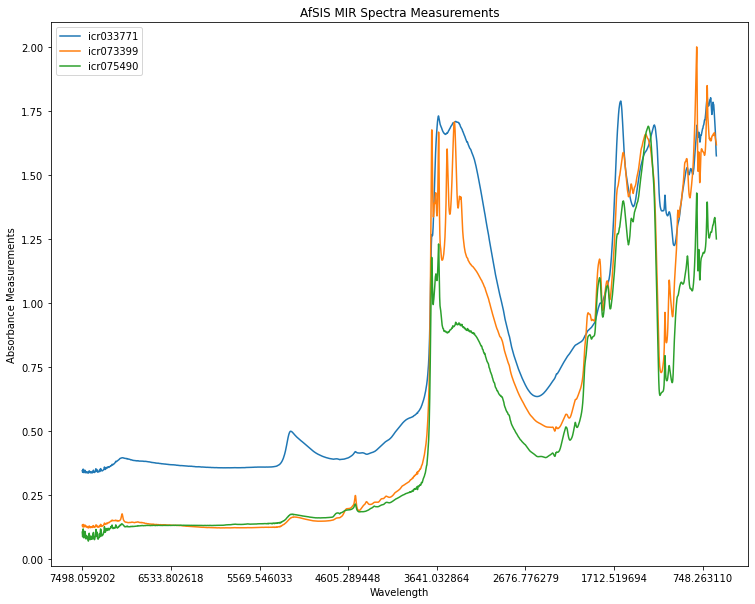

In [ ]:
# Plot a few of the spectra

fig = spectra_htsxt_df.sample(3).T.plot(figsize = (12.5, 10), title = 'AfSIS MIR Spectra Measurements')
fig.set_xlabel("Wavelength")
fig.set_ylabel("Absorbance Measurements")
#fig.legend(bbox_to_anchor = (1.2, 1))

# (Info on Other Spectrometers)

In [ ]:
spectra_kbr_df

,3998.360226,3996.943874,3995.527523,3994.111171,3992.694820,3991.278468,3989.862117,3988.445765,3987.029414,3985.613062,3984.196711,3982.780359,3981.364008,3979.947656,3978.531305,3977.114953,3975.698602,3974.282250,3972.865899,3971.449547,3970.033196,3968.616845,3967.200493,3965.784142,3964.367790,3962.951439,3961.535087,3960.118736,3958.702384,3957.286033,3955.869681,3954.453330,3953.036978,3951.620627,3950.204275,3948.787924,3947.371572,3945.955221,3944.538869,3943.122518,...,454.648825,453.232473,451.816122,450.399770,448.983419,447.567067,446.150716,444.734364,443.318013,441.901661,440.485310,439.068959,437.652607,436.236256,434.819904,433.403553,431.987201,430.570850,429.154498,427.738147,426.321795,424.905444,423.489092,422.072741,420.656389,419.240038,417.823686,416.407335,414.990983,413.574632,412.158280,410.741929,409.325577,407.909226,406.492875,405.076523,403.660172,402.243820,400.827469,399.411117
icr076348,0.849720,0.849401,0.849264,0.849393,0.849818,0.850517,0.851431,0.852496,0.853654,0.854872,0.856135,0.857429,0.858727,0.859977,0.861114,0.862085,0.862875,0.863511,0.864048,0.864535,0.864987,0.865379,0.865672,0.865842,0.865915,0.865960,0.866065,0.866299,0.866684,0.867194,0.867775,0.868372,0.868950,0.869498,0.870017,0.870514,0.870994,0.871461,0.871908,0.872316,...,2.098365,2.104602,2.113890,2.127294,2.143960,2.160885,2.173668,2.178610,2.175115,2.166088,2.155853,2.147663,2.142481,2.139069,2.134968,2.128011,2.117728,2.105719,2.094740,2.087391,2.085264,2.088445,2.094955,2.101161,2.104925,2.106540,2.104499,2.096480,2.083940,2.071178,2.062008,2.058770,2.062777,2.074678,2.094493,2.121511,2.153959,2.188170,2.217569,2.233834
icr076622,0.817454,0.817807,0.817847,0.817701,0.817519,0.817415,0.817444,0.817594,0.817807,0.818005,0.818112,0.818076,0.817884,0.817570,0.817211,0.816905,0.816746,0.816784,0.817013,0.817376,0.817786,0.818167,0.818479,0.818724,0.818944,0.819200,0.819552,0.820038,0.820657,0.821361,0.822057,0.822634,0.822989,0.823075,0.822924,0.822651,0.822429,0.822428,0.822754,0.823419,...,1.976080,1.963702,1.957361,1.957433,1.962887,1.971713,1.981364,1.989307,1.993719,1.994087,1.991315,1.987179,1.983418,1.980915,1.979338,1.977344,1.973289,1.966137,1.956075,1.944488,1.933406,1.924837,1.920223,1.920056,1.923589,1.928843,1.933225,1.934750,1.933065,1.929384,1.925539,1.923065,1.922785,1.924787,1.928491,1.932686,1.935644,1.935575,1.931546,1.924491
icr008008,0.757213,0.757424,0.757878,0.758634,0.759666,0.760862,0.762068,0.763123,0.763912,0.764388,0.764586,0.764611,0.764608,0.764728,0.765083,0.765721,0.766608,0.767649,0.768715,0.769684,0.770476,0.771062,0.771456,0.771695,0.771813,0.771839,0.771799,0.771727,0.771676,0.771711,0.771895,0.772261,0.772802,0.773474,0.774215,0.774976,0.775742,0.776533,0.777382,0.778302,...,1.967796,1.966865,1.968097,1.972559,1.980935,1.993241,2.008605,2.025208,2.040725,2.053333,2.062667,2.069725,2.075776,2.081312,2.085804,2.088227,2.087882,2.084960,2.080505,2.076003,2.073013,2.073044,2.077445,2.087018,2.101471,2.119500,2.139905,2.162218,2.185571,2.207478,2.224238,2.232486,2.230523,2.218591,2.198298,2.171818,2.141350,2.109014,2.077133,2.048517
icr055704,0.659591,0.659732,0.659801,0.659854,0.659947,0.660127,0.660410,0.660782,0.661206,0.661633,0.662007,0.662278,0.662402,0.662361,0.662167,0.661877,0.661585,0.661400,0.661414,0.661672,0.662167,0.662843,0.663619,0.664404,0.665105,0.665630,0.665907,0.665897,0.665621,0.665162,0.664644,0.664189,0.663875,0.663711,0.663649,0.663627,0.663614,0.663640,0.663774,0.664080,...,1.481582,1.486060,1.490356,1.494794,1.499768,1.505796,1.513501,1.523433,1.535765,1.550036,1.565095,1.579386,1.591486,1.600665,1.607154,1.611933,1.616169,1.620623,1.625349,1.629809,1.633321,1.635627,1.637322,1.639903,1.645310,1.655073,1.669545,1.687770,1.708089,1.728961,1.749392,1.768788,1.786435,1.801043,1.810654,1.813007,1.806211,1.789501,1.763892,1.732510
icr048584,0.789922,0.789811,0.789675,0.789535,0.789428,0.789407,0.789523,0.789795,0.790200,0.790674,0.791140,0.791540,0.791842,0.792040,0.7

In [ ]:
spectra_znse_df

,3996.480987,3994.442115,3992.403243,3990.364370,3988.325498,3986.286626,3984.247754,3982.208882,3980.170009,3978.131137,3976.092265,3974.053393,3972.014520,3969.975648,3967.936776,3965.897904,3963.859032,3961.820159,3959.781287,3957.742415,3955.703543,3953.664671,3951.625798,3949.586926,3947.548054,3945.509182,3943.470309,3941.431437,3939.392565,3937.353693,3935.314821,3933.275948,3931.237076,3929.198204,3927.159332,3925.120459,3923.081587,3921.042715,3919.003843,3916.964971,...,579.331148,577.292275,575.253403,573.214531,571.175659,569.136787,567.097914,565.059042,563.020170,560.981298,558.942425,556.903553,554.864681,552.825809,550.786937,548.748064,546.709192,544.670320,542.631448,540.592575,538.553703,536.514831,534.475959,532.437087,530.398214,528.359342,526.320470,524.281598,522.242726,520.203853,518.164981,516.126109,514.087237,512.048364,510.009492,507.970620,505.931748,503.892876,501.854003,499.815131
icr008008,1.001653,1.001850,1.002044,1.002246,1.002458,1.002649,1.002780,1.002839,1.002859,1.002899,1.003007,1.003191,1.003418,1.003628,1.003767,1.003821,1.003837,1.003897,1.004063,1.004331,1.004635,1.004888,1.005033,1.005068,1.005039,1.005019,1.005080,1.005270,1.005591,1.005985,1.006354,1.006596,1.006673,1.006633,1.006566,1.006531,1.006516,1.006489,1.006462,1.006513,...,2.138201,2.164320,2.188174,2.205342,2.212700,2.209023,2.194334,2.169026,2.133869,2.090577,2.041902,1.991042,1.941158,1.895373,1.856714,1.827516,1.808598,1.798994,1.796549,1.798970,1.804730,1.813393,1.825287,1.840718,1.859014,1.877693,1.892332,1.897892,1.891259,1.872935,1.846062,1.813820,1.777646,1.737400,1.692789,1.644833,1.596528,1.552029,1.514539,0.0
icr055704,1.081034,1.081427,1.081817,1.082172,1.082484,1.082766,1.083035,1.083305,1.083568,1.083795,1.083949,1.084017,1.084025,1.084018,1.084037,1.084101,1.084224,1.084424,1.084706,1.085041,1.085361,1.085586,1.085670,1.085630,1.085542,1.085516,1.085649,1.085983,1.086480,1.087033,1.087502,1.087785,1.087877,1.087883,1.087936,1.088087,1.088287,1.088454,1.088570,1.088723,...,2.275345,2.267229,2.262507,2.260712,2.257953,2.248774,2.230832,2.206837,2.181378,2.157477,2.135714,2.114892,2.093104,2.068910,2.042443,2.015699,1.991490,1.971777,1.956628,1.944503,1.933768,1.924368,1.918114,1.917192,1.922184,1.931189,1.940800,1.948333,1.953190,1.955879,1.955986,1.951593,1.940648,1.922463,1.898184,1.870132,1.839503,1.804992,1.766765,0.0
icr048584,1.218110,1.218605,1.219080,1.219466,1.219763,1.220034,1.220370,1.220826,1.221385,1.221953,1.222415,1.222716,1.222897,1.223061,1.223282,1.223563,1.223856,1.224131,1.224406,1.224734,1.225154,1.225658,1.226182,1.226624,1.226905,1.227040,1.227161,1.227445,1.227994,1.228764,1.229594,1.230312,1.230834,1.231195,1.231481,1.231734,1.231911,1.231950,1.231851,1.231731,...,2.325212,2.328002,2.336095,2.347975,2.360037,2.367836,2.368119,2.360410,2.346774,2.330299,2.313868,2.299688,2.289049,2.281872,2.276551,2.270846,2.263303,2.253523,2.241388,2.227955,2.217514,2.216233,2.227593,2.249274,2.273268,2.289120,2.289739,2.275966,2.255064,2.234771,2.218404,2.203025,2.181858,2.150186,2.107909,2.057448,2.003410,1.955332,1.928478,0.0
icr062294,1.328959,1.328975,1.328977,1.329034,1.329175,1.329375,1.329585,1.329780,1.329964,1.330147,1.330329,1.330503,1.330671,1.330840,1.330997,1.331114,1.331169,1.331172,1.331156,1.331160,1.331207,1.331309,1.331459,1.331628,1.331789,1.331960,1.332241,1.332765,1.333597,1.334655,1.335732,1.336610,1.337200,1.337576,1.337882,1.338189,1.338453,1.338600,1.338641,1.338695,...,2.310574,2.299605,2.282725,2.261670,2.241161,2.225832,2.217638,2.215214,2.215202,2.214886,2.214005,2.213765,2.214599,2.215544,2.215345,2.213598,2.210887,2.208362,2.207469,2.209689,2.215925,2.225669,2.236567,2.245471,2.251103,2.255074,2.259019,2.261505,2.258633,2.248039,2.232316,2.217359,2.207666,2.204150,2.204316,2.201198,2.180072,2.124270,2.040354,0.0
icr048550,1.344859,1.345411,1.346170,1.347087,1.348055,1.348945,1.349668,1.350222,1.350680,1.351121,1.351569,1.351990,1.352348,1.352656,1.352979,1.353379,1.353

In [ ]:
spectra_mpa_df

,12493.177049,12489.319940,12485.462831,12481.605721,12477.748612,12473.891503,12470.034394,12466.177284,12462.320175,12458.463066,12454.605956,12450.748847,12446.891738,12443.034628,12439.177519,12435.320410,12431.463300,12427.606191,12423.749082,12419.891973,12416.034863,12412.177754,12408.320645,12404.463535,12400.606426,12396.749317,12392.892207,12389.035098,12385.177989,12381.320879,12377.463770,12373.606661,12369.749552,12365.892442,12362.035333,12358.178224,12354.321114,12350.464005,12346.606896,12342.749786,...,3749.110248,3745.253138,3741.396029,3737.538920,3733.681810,3729.824701,3725.967592,3722.110482,3718.253373,3714.396264,3710.539155,3706.682045,3702.824936,3698.967827,3695.110717,3691.253608,3687.396499,3683.539389,3679.682280,3675.825171,3671.968061,3668.110952,3664.253843,3660.396734,3656.539624,3652.682515,3648.825406,3644.968296,3641.111187,3637.254078,3633.396968,3629.539859,3625.682750,3621.825640,3617.968531,3614.111422,3610.254313,3606.397203,3602.540094,3598.682985
icr076348,0.440876,0.437973,0.436380,0.442140,0.451676,0.451501,0.443538,0.440441,0.443446,0.447607,0.448231,0.445786,0.448419,0.455588,0.459566,0.457814,0.449167,0.438388,0.438176,0.450040,0.457295,0.450989,0.443026,0.444199,0.451558,0.454779,0.449831,0.445970,0.449322,0.452209,0.450739,0.451412,0.454365,0.455218,0.454896,0.453117,0.449375,0.447403,0.447603,0.447898,...,0.948505,0.976882,1.004440,1.036728,1.085992,1.139932,1.197886,1.279043,1.373077,1.475184,1.611866,1.762844,1.889419,1.997659,2.069028,2.115866,2.178833,2.237785,2.280338,2.318891,2.404204,2.478038,2.454348,2.407279,2.359771,2.291547,2.255970,2.388500,2.665803,2.867585,2.700074,2.404806,2.369040,2.397665,2.341627,2.222403,2.106292,2.071383,2.069974,2.063961
icr076622,0.526960,0.517844,0.513258,0.516411,0.523206,0.527310,0.526293,0.523737,0.519814,0.514924,0.514774,0.518989,0.523728,0.527856,0.529755,0.529167,0.524218,0.513956,0.508487,0.515175,0.523998,0.523559,0.517417,0.513756,0.512678,0.512686,0.514167,0.515749,0.517700,0.522152,0.526706,0.526588,0.523489,0.520337,0.516475,0.514248,0.514278,0.513115,0.512207,0.514324,...,0.853605,0.877486,0.900552,0.926060,0.962435,1.000245,1.039414,1.091769,1.148258,1.208554,1.296567,1.399902,1.491380,1.582105,1.668560,1.759374,1.868141,1.956069,2.025877,2.097988,2.208926,2.371165,2.481619,2.479754,2.422256,2.384480,2.337465,2.342295,2.389109,2.457127,2.531602,2.486510,2.380374,2.393543,2.297523,2.267923,2.377209,2.328997,2.167315,2.161192
icr008008,0.783220,0.776051,0.776609,0.787818,0.803490,0.807380,0.803129,0.802712,0.798389,0.783826,0.770553,0.766489,0.769916,0.777699,0.786819,0.791841,0.787621,0.780105,0.778234,0.776585,0.766257,0.750043,0.739066,0.742838,0.761481,0.781159,0.788929,0.789787,0.796260,0.808975,0.814842,0.805081,0.789398,0.781815,0.781803,0.782424,0.781462,0.783315,0.789817,0.789092,...,1.153433,1.196333,1.237183,1.281654,1.347213,1.418868,1.495747,1.603885,1.730476,1.867658,2.044432,2.218295,2.331540,2.406294,2.430081,2.433287,2.462902,2.499520,2.546159,2.564925,2.518421,2.530350,2.596279,2.667190,2.762005,2.741298,2.569282,2.632866,2.736647,2.677875,2.572347,2.441396,2.303938,2.245898,2.277713,2.422598,3.205060,2.850728,2.785421,2.618072
icr055704,0.259292,0.256467,0.253601,0.253728,0.257889,0.261334,0.262749,0.263500,0.262919,0.262148,0.262482,0.263477,0.265596,0.267651,0.267617,0.267282,0.266129,0.262664,0.261153,0.263240,0.265933,0.266648,0.263992,0.262103,0.265386,0.269583,0.269124,0.265568,0.263991,0.264926,0.265212,0.264802,0.264321,0.263031,0.263191,0.265503,0.266112,0.265050,0.264661,0.262991,...,0.495414,0.512795,0.529805,0.549888,0.581447,0.619412,0.665138,0.732604,0.815344,0.913652,1.056401,1.222398,1.356931,1.458312,1.516385,1.545772,1.589605,1.647789,1.716671,1.803489,1.927206,2.065458,2.155591,2.194607,2.205902,2.232420,2.262160,2.292297,2.276645,2.245024,2.222673,2.185720,2.214975,2.218382,2.184367,2.106118,2.034417,2.054633,2.094270,2.065983
icr048584,0.459726,0.456428,0.454611,0.455934,0.458637,0.46

# Georeference

In [ ]:
GEOREFS_FILE = 'afsis/2009-2013/Georeferences/georeferences.csv'
georefs_df = pd.read_csv(GEOREFS_FILE)

In [ ]:
#imported folium
m = folium.Map(location = [-3.5, 35.6], tiles = "stamentoner", zoom_start = 3)

for _, row in georefs_df.iterrows():
  if row[['Latitude', 'Longitude']].notnull().all():
    folium.Circle(
        [row['Latitude'],
         row['Longitude']],
        radius = 20,
        popup = row['SSN'],
        color = "lime",
        #fill = True
    ).add_to(m)
    #folium.Marker([row['Latitude'],
    #               row['Longitude']],
    #              popup = row['SSN']).add_to(m)

m